In [2]:
import geopandas as gpd
import pandas as pd
import numpy as np
import os
import sys
from sklearn.preprocessing import MinMaxScaler
ROOT_DIR = "../"
sys.path.append(ROOT_DIR)
import matplotlib.pyplot as plt
import seaborn as sns
from utils.citymeta import load_all
city_meta = load_all()
plt.rcParams["figure.figsize"] = [3, 4]
plt.rcParams["figure.autolayout"] = True
plt.rcParams['svg.fonttype'] = 'none'


In [3]:
ROOT = "/Users/yuan/Dropbox (Personal)/Personal Work/_Projects2023"
TABLE_FOLDER = "/Users/yuan/Dropbox (Personal)/Personal Work/_Projects2023/01_city-never-was/_table"
# ROOT = "D:/Dropbox (Personal)/Personal Work/_Projects2023"
CURATED_FOLDER = f"{ROOT}/01_city-never-was/_data/_curated"

EXPORT_FOLDER = f"{ROOT}/01_city-never-was/_data/_curated/c_analysis"
DATA_FOLDER = f"{CURATED_FOLDER}/c_seg_hex"
N = 8
CITY_LEVEL_FILE = f"c_city_full_cluster={N}.csv"
HEX_LEVEL_FILE = f"c_hex_full_cluster={N}.csv"

city_df = pd.read_csv(os.path.join(EXPORT_FOLDER, CITY_LEVEL_FILE))
hex_df = pd.read_csv(os.path.join(EXPORT_FOLDER, HEX_LEVEL_FILE))

In [4]:
ROOTFOLDER = "/Users/yuan/Dropbox (Personal)/Personal Work/_Projects2023/01_city-never-was"
GRAPHIC_PATH = f"{ROOTFOLDER}/_graphic/cluster_figure"
if not os.path.exists(GRAPHIC_PATH):
    os.makedirs(GRAPHIC_PATH)

In [5]:
target_ls = [
    'num_person_killed_per_lakh_city',
    'num_person_killed_per_lakh_country',
    'cardiovascular_diseases_cap',
    'diabetes_mellitus_cap', 
    'mental_and_substance_use_disorders_cap',
             ]
# plot barplot by each city_group
label_cols = {
    "gdp_per_cap_country_2022":"GDP Country-level",
    "num_person_killed_per_lakh_city":"No. Person Killed Per Lakh",
    "mean_flux":"CO2 Flux"
}

color_schema = {
    0:"#12939A", 
    1:"#DDB27C",
    2:"#88572C",
    3:"#FF991F",
    4:"#F15C17",
    5:"#223F9A",
    6:"#DA70BF",
    7:"#125C77"
                }

cluster_name = {
0:"openview highway connectors",
1:"high-rise & car-oriented CBD",
2:"vegetation-rich low density area",
3:"scenery open space",
4:"low-rise diverse street",
5:"low-rise vegetated living community",
6:"tunnel/bridge",
7:"multi-modal traffic CBD"
} # need to find some example images to check the results

In [17]:
hex_df_summary = hex_df.groupby('cluster_8').size().reset_index().rename(columns = {0: "hex_count"})
hex_df_summary['cluster_name'] = hex_df_summary['cluster_8'].apply(lambda x:cluster_name[x])
hex_df_summary

,cluster_8,hex_count,cluster_name
0,0,57771,openview highway connectors
1,1,46002,high-rise & car-oriented CBD
2,2,41500,vegetation-rich low density area
3,3,40676,scenery open space
4,4,47746,low-rise diverse street
5,5,52214,low-rise vegetated living community
6,6,40002,tunnel/bridge
7,7,48690,multi-modal traffic CBD


In [24]:
hex_df['img_count_city'].sum()

31340205

In [21]:
hex_df_summary.to_csv(os.path.join(TABLE_FOLDER, "hex_cluster.csv"), index = False
                      )

In [6]:
# create ranking of target

def generate_summary(target):
    city_df[f'rank_{target}'] = city_df[target].rank(ascending=False)
    city_df[f'rank_{target}'] = city_df[f'rank_{target}'].astype(int)
    # city_df.sort_values(f'rank_{target}')[[f'rank_{target}', target, 'city_lower']]
    # create quintile of the target
    city_df[f'quintile_{target}'] = pd.qcut(city_df[target], 10, labels=False)
    city_df[f'quintile_{target}'] = city_df[f'quintile_{target}'].astype(int)
    city_df.sort_values(f'rank_{target}')[[f'quintile_{target}', target, 'city_lower']]
    clustervari = [f'cluster_{i}' for i in range(N)]
    city_df_summary = city_df[[f'quintile_{target}','city_lower']+clustervari].groupby(f'quintile_{target}')\
            .mean()
    return city_df_summary


In [7]:

cluster_column_order_num = [6,2,3,4,7,0,1,5] 
cluster_column_order = [f'cluster_{i}' for i in cluster_column_order_num]
# city_df_summary = city_df_summary[cluster_column_order]

/var/folders/hw/_9ws64g138s7p677clyddq480000gn/T/ipykernel_24076/3235095235.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])


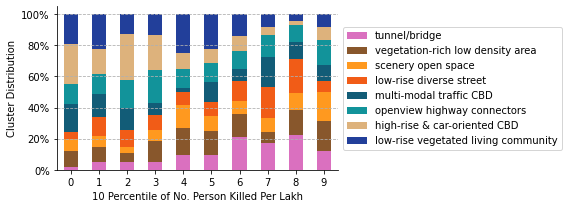

In [19]:
# plot a stacked horizontal barchart to show the distribution of cluster in each quintile
import matplotlib.pyplot as plt
import seaborn as sns

target = 'num_person_killed_per_lakh_city'
# target = 'gdp_per_cap_country_2022'
# target = 'mean_flux'
city_df_summary = generate_summary(target)

fig, ax = plt.subplots(figsize=(8,3))
city_df_summary[cluster_column_order].plot(kind='bar', 
                                  stacked=True, 
                                    color=[color_schema[i] for i in cluster_column_order_num],
                                  ax=ax)
sns.despine()
# move the legend to the right
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),
           # relabel the legend
            labels=[cluster_name[i] for i in cluster_column_order_num]
           )
# y-axis label
plt.xlabel(f"10 Percentile of {label_cols[target]}")
# x-axis tick label horizontal
plt.xticks(rotation=0)
# x-axis label
# convert x-axis to percentage
ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])
plt.ylabel("Cluster Distribution")

plt.grid(axis='y', linestyle='--')

plt.savefig(
    os.path.join(GRAPHIC_PATH, f"{target}_distribution.svg"),
    dpi = 200,
    
            )

In [21]:

# sel_city = np.random.choice(city_df['City'], 30)
# city_df['City'].unique()

In [30]:
# visualize several cities
sel_city = [
    'Stockholm',
     'Munich',
     'Milan',
     'Madrid',
    'Hong Kong', 
     'Singapore',
     'Tokyo',
            'London', 
           'Sydney',
            'Montereal',
            'New York',
            'Boston', 
            'Denver',
            'Santiago',
            'Buenos Aires',
            'Quito',
            'Wellington',
            
            # 'Capetown',
            'Johannesburg',
            'Delhi',
            'Bangalore',
            'Medan',
            'Lima',
            
            'Bangkok',
            'Jakarta',
            
            'Gaborone',
            'Accra',
            'Capetown',
            'Nairobi',
            'Moscow',
            'Palembang',
            'Guadalajara'
            ]
print(len(sel_city))
city_abbr_ls = [x.lower().replace(" ", "") for x in sel_city]
sel_df = city_df[city_df['City'].isin(sel_city)].reset_index(drop = True).sort_values(
    'num_person_killed_per_lakh_city')
sel_df = sel_df.set_index('City')[cluster_column_order]
# sel_df

31


/var/folders/hw/_9ws64g138s7p677clyddq480000gn/T/ipykernel_17628/2503902679.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])


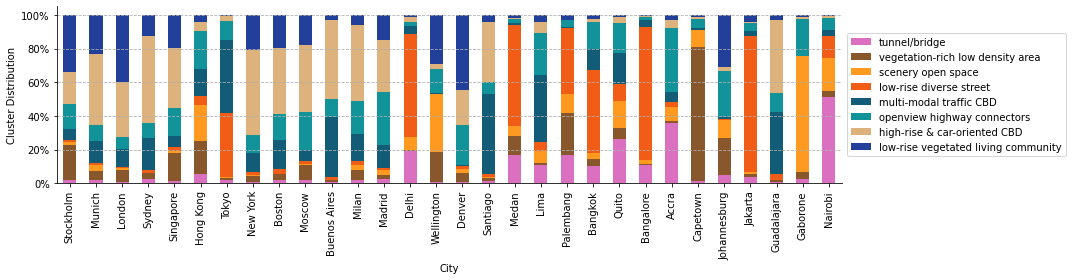

In [31]:
fig, ax = plt.subplots(figsize=(15,4))
sel_df.plot(kind='bar', 
                    stacked=True, 
                      color=[color_schema[i] for i in cluster_column_order_num],
                    ax=ax)
sns.despine()
# move the legend to the right
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),
           # relabel the legend
            labels=[cluster_name[i] for i in cluster_column_order_num]
           )
# y-axis label
# plt.xlabel(f"10 Percentile of {label_cols[target]}")
# x-axis label
# convert x-axis to percentage
ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])
# rotate 45 degree for the x-axis
plt.xticks(rotation=90)

plt.ylabel("Cluster Distribution")
# show main grids
plt.grid(axis='y', linestyle='--')

plt.savefig(
    os.path.join(GRAPHIC_PATH, "cluster_distribution_selected_city.svg"),
    dpi = 200,
    
            )

# 1. Viz the cluster comparison from regression results